In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_raw = '''90	84	76	42	36	07	45	56	79	18	87	12	48	72	59	09	36	10	42	87
06	01	13	72	21	55	19	99	21	04	39	11	40	67	05	28	27	50	84	58
20	24	22	69	96	81	30	84	92	72	72	50	25	85	22	99	40	42	98	13'''

In [43]:
data = [
    list(zip(*[
        (int(entry[0]), int(entry[1]))
        for entry in row.split('\t')
    ]))
    for row in data_raw.split('\n')
]
data = [
    pd.DataFrame({ 'Q1': entries[0], 'Q2': entries[1] })
    for entries in data
]

for i, df in enumerate(data):
    print(f'Row {i+1}')
    display(df.T)

Row 1


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Q1,9,8,7,4,3,0,4,5,7,1,8,1,4,7,5,0,3,1,4,8
Q2,0,4,6,2,6,7,5,6,9,8,7,2,8,2,9,9,6,0,2,7


Row 2


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Q1,0,0,1,7,2,5,1,9,2,0,3,1,4,6,0,2,2,5,8,5
Q2,6,1,3,2,1,5,9,9,1,4,9,1,0,7,5,8,7,0,4,8


Row 3


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Q1,2,2,2,6,9,8,3,8,9,7,7,5,2,8,2,9,4,4,9,1
Q2,0,4,2,9,6,1,0,4,2,2,2,0,5,5,2,9,0,2,8,3


In [ ]:
dominates_cols = ['Q1', 'Q2']

# a and b are expected to be pandas Series
def dominates_eq(a, b):
    return (a[dominates_cols] == b[dominates_cols]).all()

# a and b are expected to be pandas Series
def dominates_pareto(a, b):
    return (a[dominates_cols] >= b[dominates_cols]).all()

# a and b are expected to be pandas Series
def dominates_slater(a, b):
    return (a[dominates_cols] > b[dominates_cols]).all()

In [ ]:
def calculate(df, pareto):
    if pareto:
        dominates = dominates_pareto
        set_col = 'P'
    else:
        dominates = dominates_slater
        set_col = 'S'
    
    i = 0
    while i < len(df):
        j = i + 1
        while j < len(df):
            if dominates_eq(df.loc[i], df.loc[j]):
                df.loc[j, set_col] = f'={i}'
                j += 1
                continue
            
            if dominates(df.loc[i], df.loc[j]):
                df.loc[j, set_col] = i
            elif dominates(df.loc[j], df.loc[i]):
                df.loc[i, set_col] = j
                break
            j += 1
        i += 1
    
    return df

In [ ]:
def plot_ax(ax, df, pareto, boundary_sort_order):
    if pareto:
        title = 'Pareto'
        set_col = 'P'
    else:
        title = 'Slater'
        set_col = 'S'

    mask = df[set_col] == ''
    set_points = df[mask]
    non_set_points = df[~mask]
    ax.scatter(non_set_points['Q1'], non_set_points['Q2'], label=f'non-{title.lower()}')
    ax.scatter(set_points['Q1'], set_points['Q2'], label=title.lower())

    set_points = set_points.sort_values(by=boundary_sort_order[0], ascending=boundary_sort_order[1])
    ax.plot(set_points['Q1'], set_points['Q2'], color='green', zorder=-10)
    
    ax.set_title(title)
    ax.legend()
    ax.set_xlabel('Q1')
    ax.set_ylabel('Q2')

In [ ]:
def plot(df, title, boundary_sort_order):
    fig, (ax_p, ax_s) = plt.subplots(1, 2, figsize=(8,4), sharey=True)
    fig.suptitle(title, fontsize=16)
    plot_ax(ax_p, df, True, boundary_sort_order)
    plot_ax(ax_s, df, False, boundary_sort_order)

    plt.show()

In [20]:
for i, df in enumerate(data):
    df['P'] = ''
    df['S'] = ''
    calculate(df, True)
    calculate(df, False)
    pareto_set = '; '.join([str(i) for i in df[df['P'] == ''].index])
    slater_set = '; '.join([str(i) for i in df[df['S'] == ''].index])
    
    print(f'Row {i+1}')
    print('Pareto set: ' + pareto_set)
    print('Slater set: ' + slater_set)
    display(df.T)

Row 1
Pareto set: 0; 8; 10
Slater set: 0; 1; 8; 10; 14; 15


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Q1,9,8,7,4,3,0,4,5,7,1,8,1,4,7,5,0,3,1,4,8
Q2,0,4,6,2,6,7,5,6,9,8,7,2,8,2,9,9,6,0,2,7
P,,10,8,6,7,8,7,8,,12,,12,14,19,8,14,19,18,19,=10
S,,,10,7,8,8,7,8,,14,,12,14,19,,,19,18,19,=10


Row 2
Pareto set: 7
Slater set: 6; 7; 10


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Q1,0,0,1,7,2,5,1,9,2,0,3,1,4,6,0,2,2,5,8,5
Q2,6,1,3,2,1,5,9,9,1,4,9,1,0,7,5,8,7,0,4,8
P,6,2,5,7,5,7,7,,10,10,7,13,13,7,15,19,19,18,7,7
S,6,2,5,7,5,7,,,10,10,,13,13,7,15,10,19,18,7,7


Row 3
Pareto set: 15
Slater set: 3; 4; 8; 15; 18


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Q1,2,2,2,6,9,8,3,8,9,7,7,5,2,8,2,9,4,4,9,1
Q2,0,4,2,9,6,1,0,4,2,2,2,0,5,5,2,9,0,2,8,3
P,1,3,3,15,15,7,7,13,15,13,13,13,13,15,15,,17,18,15,18
S,3,3,3,,,8,7,15,,13,13,13,15,15,15,,18,18,,18


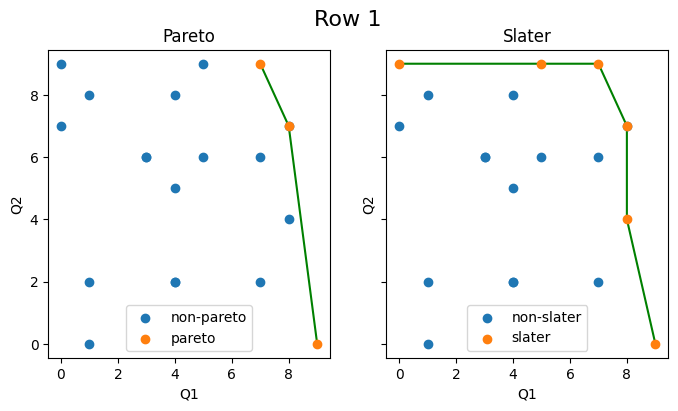

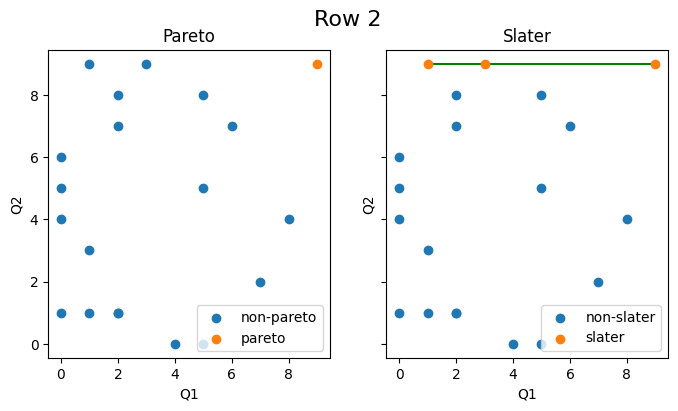

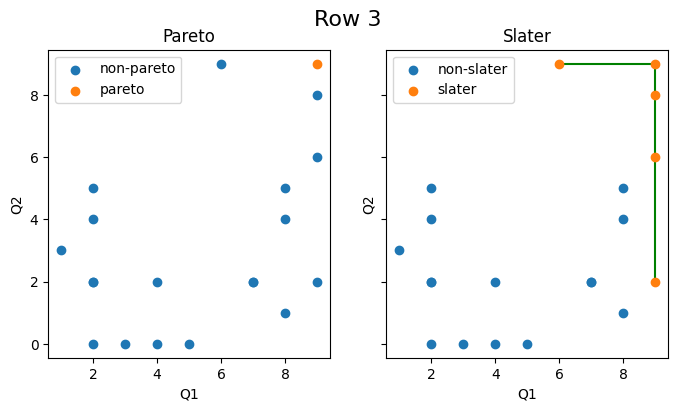

In [33]:
boundary_sort_orders = [
    (['Q2','Q1'], [True, False]),
    (['Q2','Q1'], [True, False]),
    (['Q2','Q1'], [True, False]),
]
for i, (df, boundary_sort_order) in enumerate(zip(data, boundary_sort_orders)):
    plot(df, f'Row {i+1}', boundary_sort_order)

In [45]:
data_combined = pd.concat(data, ignore_index=True)

In [51]:
data_combined['P'] = ''
data_combined['S'] = ''
calculate(data_combined, True)
calculate(data_combined, False)
data_combined_pareto_set = '; '.join([str(i) for i in data_combined[data_combined['P'] == ''].index])
data_combined_slater_set = '; '.join([str(i) for i in data_combined[data_combined['S'] == ''].index])

print(f'Data Combined')
print('Pareto set: ' + data_combined_pareto_set)
print('Slater set: ' + data_combined_slater_set)

Data Combined
Pareto set: 27
Slater set: 0; 8; 14; 15; 26; 27; 30; 43; 44; 48; 58


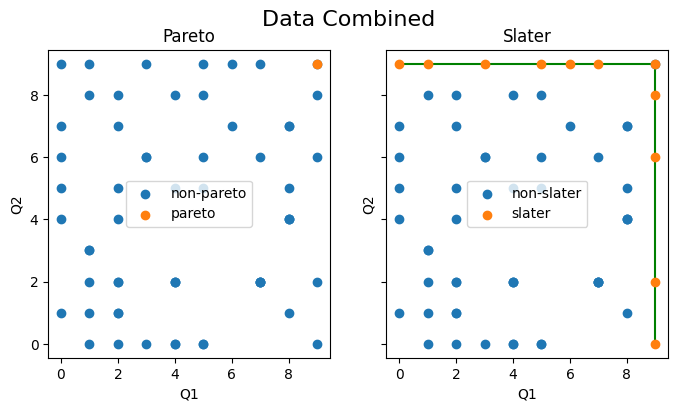

In [49]:
plot(data_combined, 'Data Combined', (['Q2','Q1'], [True, False]))

In [50]:
data_combined.T.to_csv('./lab1_3rows.csv')